<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/KNeighborsRegression_overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 회귀



*   회귀(Regression): 두 변수 사이의 상관 관계를 분석하여 임의의 어떤 숫자를 예측하는 것.
* 지도 학습의 한 종류(지도 학습은 크게 회귀와 분류로 나뉜다.)
* 앞에서는 K - 최근접 이웃 분류를 했지만, 여기선 K - 최근접 이웃 <회귀>를 하니깐 헷갈리지 말것!
* 방식


  1.   예측 하려는 샘플의 주변 샘플 k개를 선택
  2.   선택한 k 개의 샘플의 타깃 값(임의의 값, 클래스 X)들의 평균을 구함
  3.   그 평균이 구하려는 샘플의 타깃 예측 값





In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) #바로 numpy 배열로 만들기
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

**산점도 그려서 데이터 분포 보기**

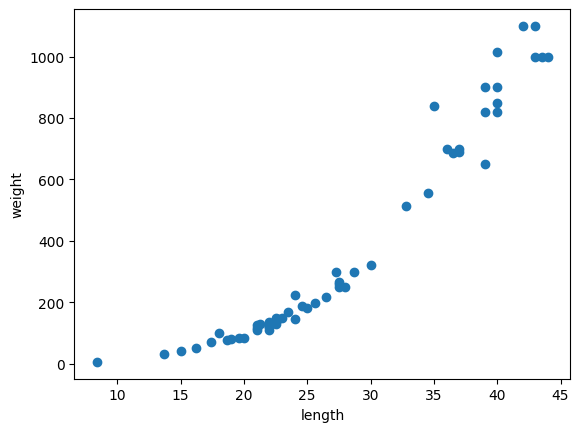

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**훈련 세트 테스트 세트 나누기**

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

**sklearn에 사용할 훈련 세트는 2차원 배열이여야 함**

In [4]:
test_array = np.array([1,2, 3, 4])
print(test_array.shape) #1차원 배열의 크기는 원소가 하나인 튜플로 나타낸다

(4,)


In [11]:
test_array = test_array.reshape(2, 2) #reshape(행, 열) 1차원 배열을 2차원 배열로 만듦
print(test_array)
#reshape() 사용 시 지정한 크기가 원본 배열의 원소 수와 다르지 않게 주의

[[1 2]
 [3 4]]


In [6]:
train_input = train_input.reshape(-1, 1) #reshape()의 매개변수를 -1로 지정하면 나머지 원소의 개수로 모두 채우라는 의미이다.
test_input = test_input.reshape(-1, 1) #배열 개수 안외워도 되서 편리함
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정 계수(R^2)



*   분류에 정확도가 있듯이 회귀엔 결정 계수가 있다!
*   계산 방법

> R^2 = 1 - {(타깃-예측)^2의 합 / (타깃 - 평균)^2 의 합}

* 예측이 타깃에 가까워지면 R^2의 값이 1에 가까워지고, 예측이 타깃의 평균 정도를 예측하는 수준이라면 R^2는 0에 가까워진다





In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) #테스트 세트 예측

#mead_absolute_error(): 타깃과 예측의 절댓값 오차를 평균하여 반환한다
mae = mean_absolute_error(test_target, test_prediction) # 테스트 세트에 대한 평균 절댓값 오차를 계산, 조금 더 정량적인 평가법

print(mae) #결과에서 예측이 평균적으로 19g정도 다르다는 소리여

19.157142857142862


In [9]:
print(knr.score(train_input, train_target)) #훈련 세트에 대한 결정 계수

0.9698823289099254


**훈련 세트의 점수가 테스트 세트의 점수보다 낮다!!! => 과소 적합 발생**

# 과소 적합과 과대 적합



*   과소 적합
    - 훈련 세트보다 테스트 세트의 점수가 높거나, 두 점수가 모두 너무 낮은 경우
    - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않았음
*   과대 적합
    - 훈련 세트에선 점수가 높았는데 테스트 세트에서 점수가 굉장히 나쁜 경우
    - 훈련 세트에만 너무 잘 맞는 모델이라 실전이랑 테스트 땐 예측이 잘 맞지 않음



* 해결법
    - 모델을 더 복잡하게 만들기, 즉 훈련 세트에 더 잘 맞게 만들기
    - k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 법 => k의 개수를 줄이기
    - k의 개수를 줄이면 모델은 훈련 세트에 있는 패턴에 더 민감해지고, k의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 학습함

In [12]:
knr.n_neighbors = 3 #k의 값 3으로 변경

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target)) #훈련 세트 점수가 올랐음

0.9804899950518966


In [13]:
knr.score(test_input, test_target) #테스트 세트 점수가 낮아짐
# 그리고 훈련 세트와 테스트 세트의 점수 차이가 크지 않으므로 과대적합도 아님

0.9746459963987609

# k의 값이 커짐에 따라 점점 단순해져가는 모델

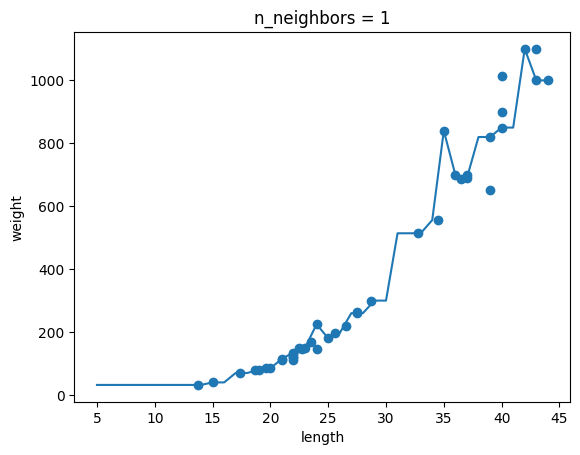

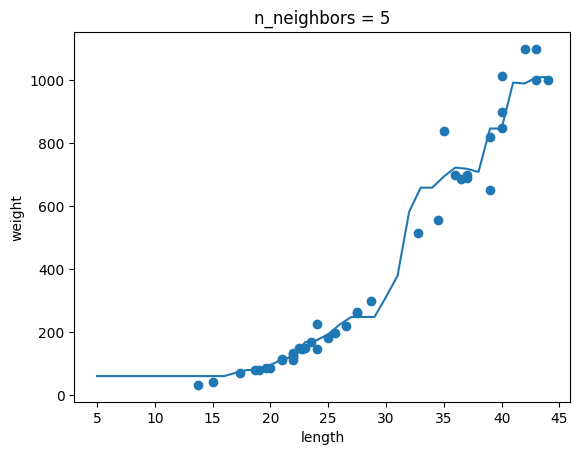

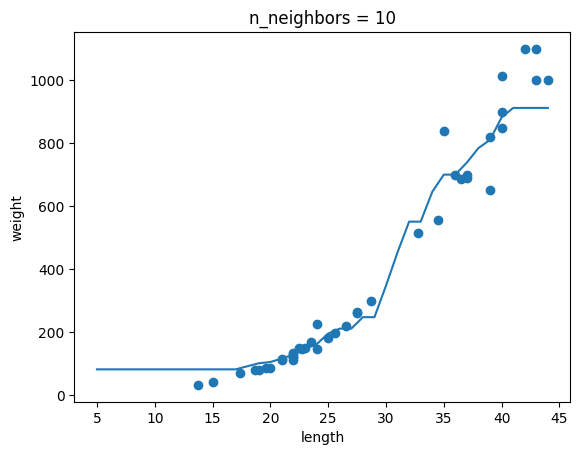

In [16]:
knr = KNeighborsRegressor()
#5에서 45까지 x 좌표 만들기
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  #지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)

  #훈련 세트와 예측 결과를 그래프로 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction) #plot() x축과 y축의 값을 받아 선 그래프를 그린다.
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()